In [41]:
# Project on: Machine learning model to predict if a credit card application will get approved.
# Project made in association with Technocolabs
# By Tanmeet Singh Chhabda

# Let's Start by importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# Load dataset
cc_apps = pd.read_csv("crx.data", header=None)
# Inspect data
cc_apps.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [42]:
# summary statistics
print(cc_apps.describe())
# Inspect types and values
print(cc_apps.info())

               2           7          10             14
count  690.000000  690.000000  690.00000     690.000000
mean     4.758725    2.223406    2.40000    1017.385507
std      4.978163    3.346513    4.86294    5210.102598
min      0.000000    0.000000    0.00000       0.000000
25%      1.000000    0.165000    0.00000       0.000000
50%      2.750000    1.000000    0.00000       5.000000
75%      7.207500    2.625000    3.00000     395.500000
max     28.000000   28.500000   67.00000  100000.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
0     690 non-null object
1     690 non-null object
2     690 non-null float64
3     690 non-null object
4     690 non-null object
5     690 non-null object
6     690 non-null object
7     690 non-null float64
8     690 non-null object
9     690 non-null object
10    690 non-null int64
11    690 non-null object
12    690 non-null object
13    690 non-null object
14    690 non-null int64
1

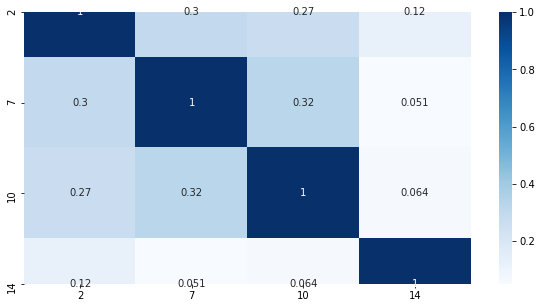

In [43]:
# correlation plot
plt.figure(figsize=(10, 5))
ax = plt.subplot()
g = sn.heatmap(cc_apps.corr(),annot=True, cmap='Blues')

In [44]:
# Inspect missing values
print(cc_apps.tail())
# Replace the '?'s with NaN
cc_apps = cc_apps.replace('?', np.nan)
# Inspect the missing values again
print(cc_apps.tail(5))

    0      1       2  3  4   5   6     7  8  9   10 11 12     13   14 15
685  b  21.08  10.085  y  p   e   h  1.25  f  f   0  f  g  00260    0  -
686  a  22.67   0.750  u  g   c   v  2.00  f  t   2  t  g  00200  394  -
687  a  25.25  13.500  y  p  ff  ff  2.00  f  t   1  t  g  00200    1  -
688  b  17.92   0.205  u  g  aa   v  0.04  f  f   0  f  g  00280  750  -
689  b  35.00   3.375  u  g   c   h  8.29  f  f   0  t  g  00000    0  -
    0      1       2  3  4   5   6     7  8  9   10 11 12     13   14 15
685  b  21.08  10.085  y  p   e   h  1.25  f  f   0  f  g  00260    0  -
686  a  22.67   0.750  u  g   c   v  2.00  f  t   2  t  g  00200  394  -
687  a  25.25  13.500  y  p  ff  ff  2.00  f  t   1  t  g  00200    1  -
688  b  17.92   0.205  u  g  aa   v  0.04  f  f   0  f  g  00280  750  -
689  b  35.00   3.375  u  g   c   h  8.29  f  f   0  t  g  00000    0  -


In [45]:
# Impute the missing values with mean imputation
cc_apps.fillna(cc_apps.mean(), inplace=True)
# Count the number of NaNs in the dataset to verify
print(cc_apps.isnull().sum())

0     12
1     12
2      0
3      6
4      6
5      9
6      9
7      0
8      0
9      0
10     0
11     0
12     0
13    13
14     0
15     0
dtype: int64


In [46]:
# Iterate over each column of cc_apps
for col in cc_apps.columns:
    # Check if the column is of object type
    if cc_apps[col].dtypes == 'object':
        # Impute with the most frequent value
        cc_apps = cc_apps.fillna(cc_apps[col].value_counts().index[0])
# Count the number of NaNs in the dataset and print the counts to verify
print(cc_apps.isnull().sum())

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64


In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Iterate over all the values 
for col in cc_apps.columns.values:
    # Compare if the dtype is object
    if cc_apps[col].dtypes =='object':
    # Use LabelEncoder to do the numeric transformation
        cc_apps[col]=le.fit_transform(cc_apps[col])
cc_apps.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,0.695652,150.528986,4.758725,2.215942,1.466667,6.607246,5.994203,2.223406,0.523188,0.427536,2.40000,0.457971,0.176812,59.392754,1017.385507,0.555072
std,0.460464,96.188946,4.978163,0.477087,0.860126,4.412110,2.594506,3.346513,0.499824,0.495080,4.86294,0.498592,0.557869,48.231670,5210.102598,0.497318
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,71.000000,1.000000,2.000000,1.000000,2.000000,4.000000,0.165000,0.000000,0.000000,0.00000,0.000000,0.000000,23.000000,0.000000,0.000000
50%,1.000000,133.500000,2.750000,2.000000,1.000000,6.000000,8.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,52.000000,5.000000,1.000000
75%,1.000000,226.000000,7.207500,2.000000,1.000000,11.000000,8.000000,2.625000,1.000000,1.000000,3.00000,1.000000,0.000000,96.000000,395.500000,1.000000
max,1.000000,349.000000,28.000000,3.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.00000,1.000000,2.000000,170.000000,100000.000000,1.000000


In [48]:
from sklearn.model_selection import train_test_split
# Drop the features 11 and 13 and convert the DataFrame to a NumPy array
cc_apps = cc_apps.drop([11, 13], axis=1)
cc_apps = cc_apps.values
X,y = cc_apps[:,0:12] , cc_apps[:,13]
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                y,
                                test_size=0.33,
                                random_state=42)
# to check if the it's completed print done!
print('Done!')

Done!


In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)
print(rescaledX_train[:10,:])

[[0.         0.24928367 0.0949307  1.         1.         0.5
  0.11111111 0.225      0.         0.         0.         0.        ]
 [1.         0.52148997 0.10442377 0.66666667 0.33333333 0.71428571
  0.88888889 0.2125     1.         1.         0.08955224 0.        ]
 [1.         0.48710602 0.05695842 0.66666667 0.33333333 0.14285714
  0.88888889 0.0125     0.         0.         0.         0.        ]
 [1.         0.42406877 0.04119992 1.         1.         0.14285714
  0.88888889 0.002      0.         0.         0.         0.        ]
 [0.         0.60744986 0.19460794 0.66666667 0.33333333 0.35714286
  0.88888889 0.25       1.         0.         0.         0.        ]
 [0.         0.35243553 0.07746345 0.66666667 0.33333333 0.92857143
  0.88888889 0.0125     0.         0.         0.         0.        ]
 [1.         0.65616046 0.0949307  1.         1.         0.5
  0.44444444 0.5        0.         0.         0.         1.        ]
 [1.         0.73065903 0.18663376 1.         1.       

In [50]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
# Fit logreg to the train set
logreg.fit(rescaledX_train, y_train)
# to check if the it's completed print done!
print('Done!')

Done!


Accuracy of logistic regression classifier:  0.8377192982456141


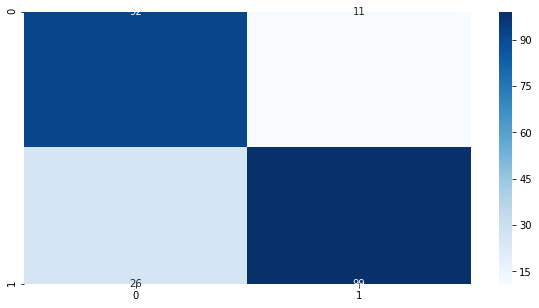

In [51]:
from sklearn.metrics import confusion_matrix
# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(rescaledX_test)
# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ", logreg.score(rescaledX_test, y_test))
# Plot the confusion matrix of the logreg model
cf_mtx = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 5))
ax = plt.subplot()
sn.heatmap(cf_mtx, annot=True, ax = ax, cmap='Blues')

In [52]:
from sklearn.model_selection import GridSearchCV
# Define the grid of values
tol = [0.01, 0.001, 0.0001]
max_iter = [100, 150, 200]
param_grid = dict(tol=tol, max_iter= max_iter)
# to check if the it's completed print done!
print('Done!')

Done!


In [53]:
# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)
# Use scaler to rescale X and assign it to rescaledX
rescaledX = scaler.fit_transform(X)
# Fit data to grid_model
grid_model_result = grid_model.fit(rescaledX, y)
# Summarize results
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
# Creating a dictionary to save the best results
best_models = {'Logistic': best_score}

print(f'Best Score: {best_score}, using {best_params}')

Best Score: 0.8521739130434782, using {'max_iter': 100, 'tol': 0.01}


In [54]:
# Project made by: Tanmeet Singh Chhabda
# Under Technocolabs
print('Stay Safe and Stay at Home')
print('Take Care & Keep Learning!')

Stay Safe and Stay at Home
Take Care & Keep Learning!
